In this simulation we are calculating TTT and CCT diagrams for following the cooling behaviour of the PM Steels.
The current notebook follows presentation given by A.Malakizadi:

Diploma work No. 42/2010
at Department of Materials and Manufacturing Technology
CHALMERS UNIVERSITY OF TECHNOLOGY
Gotheburg Sweden


# Constitutive equation and finite element formulation

Heat equation is given here in the general form to model also the phase transformations during the phase transformations of the alloy:

Conservation of the energy is given by the equation:
$$
\rho \frac{\partial E}{\partial t} - \nabla(k\nabla T)= 0
$$
where the E is specific internal energy. $ \rho, k$ and $T,t$ are density, thermal conductivity, temperature and time.
Specific internal energy can also be represented using:
$$
E(t,x)= e(T,X_i)
$$
where $ X_i $ for $i={1,2,3,4}$ are volume fraction for example of the perlite, bainite, ferrite and martensite phase.
Differenting the $e(T,X_i)$ with the respect to internal variables:
$$
\frac{\partial e}{\partial T} = c_p \\
\frac{\partial e}{\partial X_i}=-q_i
$$
Thus the general equation is given by:

$$
\rho(T)c_p(T)\frac{\partial T}{\partial t}=\frac{\partial }{\partial x}(k(T)\frac{\partial T}{\partial x}) +
\frac{\partial }{\partial y}(k(T)\frac{\partial T}{\partial y})+\frac{\partial }{\partial z}(k(T)\frac{\partial T}{\partial z})
+\sum{\rho_i(T)q_i(T) \frac{\partial X_i}{\partial t}}
$$

It is important to set also the correct boundary conditions and initial boundary conditions  for the cooling:

Cooling condition for radiation and air convection:
$$
-k\frac{\partial T}{\partial n} = h_c(T) (T-T_{\infty})+\sigma\epsilon(T)(T^{4}-T^{4}_\infty)
$$
If we are cooling by water or quenching:
$$
-k\frac{\partial T}{\partial n} = h_q(T) (T-T_{\infty})
$$
And the start temperature of the sample is given:
$$
T_0 = T(x,y,0)
$$
here the $h_c(T)$ is the convective heat transfer coefficient, $\sigma$ is the Stefan-Boltzmann constant, and $\epsilon $ is radiation emissivity of the surface and $T_\infty$ is the sorounding temperature.
It is possible to reduce the surface radiation to:
$$
\sigma \epsilon(T) (T^4-T^4_\infty)= \sigma \epsilon(T)(T^2+T^2_\infty)(T+T_\infty)(T-T_\infty)=h_r(T)(T-T_\infty)
$$
So combined radiation and convection boundary condition can be expressed by:
$$
-k\frac{\partial T}{\partial n}=h_r(T)(T-T_\infty)+h_c(T) (T-T_{\infty})=h_{rc}(T)(T-T_{\infty})
$$
where $h_{rc}$ is combined heat transfer.  

$$
\rho(T)c_p(T) \frac{\partial T}{\partial t} =k(T)\left( \frac{1}{r}  \frac{\partial }{\partial r}(r\frac{\partial T}{\partial r})+ \frac{\partial^2 T}{\partial z^2}\right)+\sum{\rho_i(T)q_i(T)\frac{\partial X_i}{\partial t}}
$$

## Incoperation of the phase transformation terms

Phase transformation in weak formulation for the phase transformation.
$$
R = \int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\rho_i q_i \frac{\partial X_i}{\partial t} rdrdz}
$$
At constant pressure is the latent heat of transformations are equal to entalphy changes $\rho q_i = \Delta H_i$

$$
R=\int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\Delta H_i \frac{\partial X_i}{\partial t} rdrdz}
$$
Time derivative can be approximated:
$$
\frac{\partial X_i}{\partial t} = \frac{\Delta X_i}{\Delta t}=\frac{X_i^{j+1}-X_i^{j}}{\Delta t}
$$
where $X^{j+1}_i$ is the volume fraction of the phase $i$ at time $j+1$. The thermal properties of the mixture are calculated
using the mixture rule:
$$
\rho c_p = \sum{X_i\rho_i c_{p_i}} \\
k = \sum{X_i k_i}
$$
Both models JMAK and AR model can be used to calculate the amount of the diffusive transformation. We focus now on the JMAK model.


# Scheil principle


The kinetics of the transformation during cooling (anisothermal condition) according to Scheil principle can the approximated by means of infinitesimal time increments $\Delta t$ and ficitious time $t^{*}$ need to gain same fraction of phase $i$ at the current temperature $T_j$

$$
t_j = \Delta t + t_j^{*}
$$
where we can calculate $t^{*}$ from JMAK model as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-X_{i,j-1}})}{k(T_j)}\right]
$$
In the case of the remaining austenite phase we should correct $X_{i,j-1}$ with:
$$
F_{i,j-1}=\frac{X_{i,j-1}}{X_{i,j-1}+X_{\gamma,j-1}}
$$
then previous equation is written as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-F_{i,j-1}})}{k(T_j)}\right]
$$
So we can calculate then the fictious volume fraction of phase $i$ at time $j$:
$$
F_{i,j}^{*}=1-exp\left(-k(T_j)t_j^{n(T_j)} \right)
$$
The incubation time of the diffusive transformation are calculated using equation:
$$
Q = \int_{0}^{t} \frac{d\epsilon}{\tau_s(T(\epsilon))}= \sum\frac{\Delta t}{\tau_s(T_j)}
$$


In [1]:
rho=7800; Cp=600.0; k=37.0; alpha=k/(Cp*rho)
def h(T):
    if (T < (225+273)):
        return 20.0
    elif ( (225+273) < T < (800+273) ):
        return -2.11e-9 * T**4 + 3.78e-6 * T**3 -0.00217*T**2 + 0.555*T-32.47
    else:
        return 92.5
    
    

Assuming that the Jominy test can be treated as the semi-infinite plate. The surface exposed to convective boundary condition exposed on one side, the analytical solution is given as:
$$
\frac{T(x,t)-T_i}{T_{\infty}-T_i}=erfc \left(\frac{x}{2\sqrt{\alpha t}}\right) - exp\left(\frac{h x }{k}+\frac{h^2 \alpha t }{k^2}\right)
erfc\left(\frac{x}{2\sqrt{\alpha t}} + \frac{h\sqrt{\alpha t} }{k}\right)
$$
The temperature distribution of the bar at different position $x$ and time $t$ can be obtained if we know distribution of temperature $T$ at previous time step $t_{i-1}$.

In [2]:
import math
def T(x,t,T):
    return math.erfc(x/(2*math.sqrt(alpha*t)))-math.exp(h(T)*x/k + (h(T)**2 * alpha * t/(k**2))) * math.erfc(x/(2*math.sqrt(alpha*t))+h(T)*math.sqrt(alpha*t)/k)

Here we calculate the temperature drop from the one dimensional solution described in previous cell, we set initial temperature of the bar to $T=1173$ K:

In [3]:
t_initial=900.0+273; t_inf=23.0+273
tr=t_initial
temp=[]
for step in range(1,300):
    a=T(0.0,step,tr)
    tr = a*(t_inf-t_initial)+t_initial
    temp.append(tr)

Plot the given temperature for position $x=0$

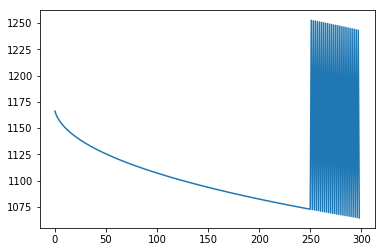

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp)
plt.show()


# Calculation of heat transfer

In this section we solve general 2d heat equation using fipy library.

In [5]:
from fipy import *
import numpy as np

Here we define the material properties for the 1080 low carbon stainless steel. The data are taken from the paper (ref).
Data are saved in the text file for reading.

In [8]:
def read_properties():
    # read the text file for different properties
    densityP = np.loadtxt(fname='./density1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    densityMA = np.loadtxt(fname='./density1080MartensiteAustenite.txt', comments='#', delimiter=',', dtype='double')
    conductivityP = np.loadtxt(fname='./conductivity1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    conductivityM = np.loadtxt(fname='./conductivity1080Martensite.txt', comments='#', delimiter=',', dtype='double')
    conductivityA = np.loadtxt(fname='./conductivity1080Austenite.txt', comments='#', delimiter=',', dtype='double')
    
    return (densityP,densityMA,conductivityP,conductivityM, conductivityA)

Interpolate the experimental data to get interpolating function:

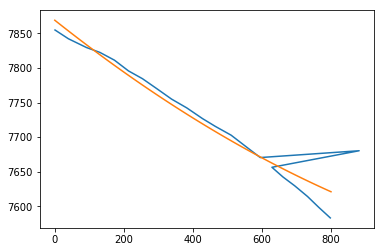

In [9]:
# curve fitting
from scipy.optimize import curve_fit, fsolve, newton
from scipy.interpolate import RectBivariateSpline
# fit the density function to second order polynomial
def density(x,a,b,c):
     return a*x**2 + b*x + c
def conductivity(x,a,b,c):
    return a*x**2 + b*x + c
#density polynomial
densP = [0.]
condM = [0.]
densityP=read_properties()[0]
densP,pcov = curve_fit(density,densityP[:,0],densityP[:,1])
conductivityM = read_properties()[3]
condM,pcov = curve_fit(conductivity,conductivityM[:,0],conductivityM[:,1])
def fP(t_):
    return densP[0]*t_**2+ densP[1]*t_ + densP[2]
def cM(t_):
    return condM[0]*t_**2+ condM[1]*t_ + condM[2]

plt.plot(densityP[:,0],densityP[:,1])
w = np.linspace(0,800,100)
plt.plot(w,fP(w))

Define some common mesh values for 2D heat flow. We create uniform cylinder mesh on which we solve axisymmetric case.

In [10]:
steps = 100
N = 40
L = 2.5*N/4000
dL = L / N
dt = 0.1
mesh = CylindricalGrid2D(dx = dL, dy = dL, nx = N, ny = N)

Also adds the fraction of different phases as cell variable, so we can calculate the contributions from different phases to heat equation.

In [11]:
fi = CellVariable(mesh=mesh, name='fractions', hasOld=True, value=0.0)
temperature = CellVariable(mesh = mesh, name='temperature',value=1173., hasOld=True)
(r,z) = mesh.cellCenters()

Initial temperature of the cylinder and surface is set to:
$T_o= 1173K$.
Boundary condition at $y=0$ is given by convection cooling condition:
$$
-k \frac{\partial T}{\partial n} = h_{rc}(T) (T-T_{\infty})
$$

The boundary condition on the $x=0$ left side of the domain is isolated:
$$
-k \frac{\partial T}{\partial n} = 0
$$
The temperature on the top and right side of cylinder are set to surounding temperature:
$T_0 = T_{\infty}$

In [12]:
vh = np.vectorize(h)
#temperature.faceGrad.dot([0,1]).constrain(-vh(temperature.faceValue)*1/k*(temperature.faceValue-t_inf),mesh.facesBottom)
temperature.faceGrad.dot([0,1]).constrain(0,mesh.facesBottom)
temperature.faceGrad.dot([1,0]).constrain(0,mesh.facesLeft)
#temperature.constrain(t_inf, mesh.facesRight)
#temperature.constrain(1173., mesh.facesTop)
fluxBottom = vh(temperature.faceValue)*(temperature.faceValue-t_inf)

For now we are assuming that complete austinite is transforming directly in martensite phase. We are using here Koistinen-Marburger law:
$$
F_m = (1-exp(-\alpha(T_{ms}-T))(1-\sum_{i=1}F_i)
$$
where $F_i$ represent the fraction of the different fractions of the perlite, banite and austinite phase. The sumation is not done for martensite phase. 
Alpha is constant taken from the paper 

In [13]:
alpha = 1.10E-2; 
Tm= 850+273;    # martensitic start temperature
def koistinen_marburger(temperature):
    #fi.setValue(1.0-np.exp(-alpha*(Tm-temperature)), where=Tm-temperature > 0)
    fi.setValue(1.0-(np.exp(-alpha*Tm)*(1+alpha*temperature+0.5*(alpha*temperature)**2+1./6*(alpha*temperature)**3)), where=Tm-temperature > 0)

Define the source term for the phase transformation effects. The phase transformation source contains the fraction of the austinite phase transformed in martensite and enthalpy of the formation.

In [14]:
deltaHm = 320E+6;
#deltaHm=0.
#def phaseSourceT():
#    return deltaHm*(fi-fi.old)/dt
def phaseSourceT():
    return TransientTerm(var=fi,coeff=deltaHm)

Now setup the temperature equation for source term comming from the phase transformations defined the flag phaseTrans.

In [15]:
temperatureEq = TransientTerm(coeff=rho*Cp,var=temperature)== DiffusionTerm(coeff=cM(temperature),var=temperature)+(mesh.facesBottom*fluxBottom).divergence+phaseSourceT()

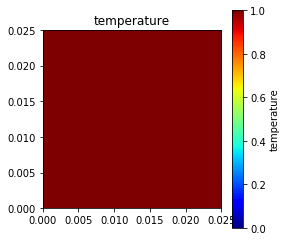

In [16]:
if __name__ == '__main__':
    temperatureViewer = Viewer(vars=temperature,figaspect=1,datamin=0,datamax=1200)

We step the solution in time, plotting as we go interactively

In [17]:
#import fipy.solvers.pyAMG as solvers
import fipy.solvers.pysparse as solvers
import numpy as np
solver = solvers.linearGMRESSolver.LinearGMRESSolver(precon=None, iterations=1500, tolerance=1e-15) 
poisson= solvers.linearLUSolver.LinearLUSolver()

steps = 3000 # number of steps to calculate
eps =1e-5
Tvstime = [] # temperature values during cooling

for i in range(steps):
    terr=10e+10
    temperature.updateOld()
    fi.updateOld()
    
    #update martensite fraction using koistinen-marburger eq.
    koistinen_marburger(temperature) 
    print max(fi)
    while(terr > eps):
        print "Residual %f" % terr
        terr = temperatureEq.sweep(temperature, dt=dt,solver=poisson)
    
    #print min(phaseSourceT())
    if __name__ == '__main__':
        path = "../../TEST/temperature/"
        temperatureViewer.plot(path+"temperatureOH"+str(i)+".eps")  
        np.savetxt(path+"temperatureOH"+str(i),temperature)
        np.savetxt(path+"martensiteOH"+str(i),fi)
        Tvstime.append(temperature.value[0])
        print "step: ", i, "Min. temperature",min(temperature), "Max. temperature", max(temperature)
        

0.0
Residual 100000000000.000000
Residual 4.628037
Residual 0.010240
Residual 0.000020
step:  0 Min. temperature 1171.4866612131289 Max. temperature 1173.0000000000005
0.0
Residual 100000000000.000000
Residual 2.833347
Residual 0.007960
Residual 0.000016
step:  1 Min. temperature 1170.4476642902832 Max. temperature 1172.9999999999993
0.0
Residual 100000000000.000000
Residual 2.303267
Residual 0.006617
Residual 0.000014
step:  2 Min. temperature 1169.6332817256446 Max. temperature 1172.9999999999884
0.0
Residual 100000000000.000000
Residual 2.049809
Residual 0.005750
Residual 0.000013
step:  3 Min. temperature 1168.9470937352198 Max. temperature 1172.9999999999284
0.0
Residual 100000000000.000000
Residual 1.892114
Residual 0.005144
Residual 0.000012
step:  4 Min. temperature 1168.3444142960802 Max. temperature 1172.999999999669
0.0
Residual 100000000000.000000
Residual 1.780285
Residual 0.004693
Residual 0.000011
step:  5 Min. temperature 1167.8012039959558 Max. temperature 1172.9999999

Residual 0.950298
Residual 0.001505
step:  54 Min. temperature 1155.4498827778282 Max. temperature 1172.9673918804199
0.0
Residual 100000000000.000000
Residual 0.945719
Residual 0.001490
step:  55 Min. temperature 1155.2858687651203 Max. temperature 1172.9640531394234
0.0
Residual 100000000000.000000
Residual 0.941245
Residual 0.001477
step:  56 Min. temperature 1155.123379616837 Max. temperature 1172.9604811024922
0.0
Residual 100000000000.000000
Residual 0.936871
Residual 0.001463
step:  57 Min. temperature 1154.9623752222806 Max. temperature 1172.9566680431608
0.0
Residual 100000000000.000000
Residual 0.932594
Residual 0.001450
step:  58 Min. temperature 1154.8028171972119 Max. temperature 1172.9526064157526
0.0
Residual 100000000000.000000
Residual 0.928411
Residual 0.001437
step:  59 Min. temperature 1154.644668781539 Max. temperature 1172.9482888653451
0.0
Residual 100000000000.000000
Residual 0.924318
Residual 0.001425
step:  60 Min. temperature 1154.4878947446673 Max. temperatu

Residual 0.795064
Residual 0.001040
step:  109 Min. temperature 1148.0102903809106 Max. temperature 1172.3061919848499
0.0
Residual 100000000000.000000
Residual 0.793413
Residual 0.001035
step:  110 Min. temperature 1147.8961351554503 Max. temperature 1172.2839447985505
0.0
Residual 100000000000.000000
Residual 0.791789
Residual 0.001030
step:  111 Min. temperature 1147.782522516868 Max. temperature 1172.2613282953675
0.0
Residual 100000000000.000000
Residual 0.790193
Residual 0.001025
step:  112 Min. temperature 1147.6694450637044 Max. temperature 1172.238343806515
0.0
Residual 100000000000.000000
Residual 0.788624
Residual 0.001020
step:  113 Min. temperature 1147.5568955523436 Max. temperature 1172.214992725274
0.0
Residual 100000000000.000000
Residual 0.787081
Residual 0.001015
step:  114 Min. temperature 1147.4448668920336 Max. temperature 1172.1912765040354
0.0
Residual 100000000000.000000
Residual 0.785564
Residual 0.001011
step:  115 Min. temperature 1147.3333521400998 Max. tem

Residual 0.000839
step:  163 Min. temperature 1142.476791467982 Max. temperature 1170.6216866038467
0.0
Residual 100000000000.000000
Residual 0.735484
Residual 0.000837
step:  164 Min. temperature 1142.3841355557847 Max. temperature 1170.5822481985786
0.0
Residual 100000000000.000000
Residual 0.734833
Residual 0.000834
step:  165 Min. temperature 1142.2917672119506 Max. temperature 1170.5425511161188
0.0
Residual 100000000000.000000
Residual 0.734194
Residual 0.000831
step:  166 Min. temperature 1142.1996834573654 Max. temperature 1170.5025975218755
0.0
Residual 100000000000.000000
Residual 0.733565
Residual 0.000829
step:  167 Min. temperature 1142.1078813520917 Max. temperature 1170.4623895722737
0.0
Residual 100000000000.000000
Residual 0.732947
Residual 0.000826
step:  168 Min. temperature 1142.0163579945904 Max. temperature 1170.4219294144395
0.0
Residual 100000000000.000000
Residual 0.732339
Residual 0.000824
step:  169 Min. temperature 1141.9251105209717 Max. temperature 1170.38

step:  217 Min. temperature 1137.8213893956927 Max. temperature 1168.1720600775866
0.0
Residual 100000000000.000000
Residual 0.712096
Residual 0.000725
step:  218 Min. temperature 1137.7407802361156 Max. temperature 1168.1214693905638
0.0
Residual 100000000000.000000
Residual 0.711826
Residual 0.000723
step:  219 Min. temperature 1137.6603397927192 Max. temperature 1168.070720066023
0.0
Residual 100000000000.000000
Residual 0.711561
Residual 0.000722
step:  220 Min. temperature 1137.5800664697463 Max. temperature 1168.0198136048564
0.0
Residual 100000000000.000000
Residual 0.711299
Residual 0.000720
step:  221 Min. temperature 1137.4999586879742 Max. temperature 1167.96875149548
0.0
Residual 100000000000.000000
Residual 0.711042
Residual 0.000719
step:  222 Min. temperature 1137.420014884508 Max. temperature 1167.9175352138925
0.0
Residual 100000000000.000000
Residual 0.710788
Residual 0.000717
step:  223 Min. temperature 1137.340233512571 Max. temperature 1167.8661662237384
0.0
Residu

Residual 0.000657
step:  272 Min. temperature 1133.6015696487405 Max. temperature 1165.1893524114928
0.0
Residual 100000000000.000000
Residual 0.701775
Residual 0.000657
step:  273 Min. temperature 1133.5282435644865 Max. temperature 1165.1319616870014
0.0
Residual 100000000000.000000
Residual 0.701648
Residual 0.000656
step:  274 Min. temperature 1133.4550185285066 Max. temperature 1165.0744781907943
0.0
Residual 100000000000.000000
Residual 0.701522
Residual 0.000655
step:  275 Min. temperature 1133.3818936188502 Max. temperature 1165.0169028442745
0.0
Residual 100000000000.000000
Residual 0.701398
Residual 0.000654
step:  276 Min. temperature 1133.308867922459 Max. temperature 1164.9592365603987
0.0
Residual 100000000000.000000
Residual 0.701275
Residual 0.000653
step:  277 Min. temperature 1133.2359405350787 Max. temperature 1164.9014802437528
0.0
Residual 100000000000.000000
Residual 0.701153
Residual 0.000652
step:  278 Min. temperature 1133.1631105611684 Max. temperature 1164.84

Residual 0.696444
Residual 0.000615
step:  327 Min. temperature 1129.6972505516114 Max. temperature 1161.9166250710375
0.0
Residual 100000000000.000000
Residual 0.696367
Residual 0.000615
step:  328 Min. temperature 1129.628318776101 Max. temperature 1161.855301456986
0.0
Residual 100000000000.000000
Residual 0.696289
Residual 0.000614
step:  329 Min. temperature 1129.5594484899104 Max. temperature 1161.7939249308051
0.0
Residual 100000000000.000000
Residual 0.696213
Residual 0.000613
step:  330 Min. temperature 1129.4906391492812 Max. temperature 1161.7324960438923
0.0
Residual 100000000000.000000
Residual 0.696136
Residual 0.000613
step:  331 Min. temperature 1129.4218902156183 Max. temperature 1161.671015342472
0.0
Residual 100000000000.000000
Residual 0.696061
Residual 0.000612
step:  332 Min. temperature 1129.353201155444 Max. temperature 1161.609483367644
0.0
Residual 100000000000.000000
Residual 0.695985
Residual 0.000612
step:  333 Min. temperature 1129.2845714403452 Max. tempe

Residual 0.000589
step:  381 Min. temperature 1126.0509271844608 Max. temperature 1158.5416134986438
0.0
Residual 100000000000.000000
Residual 0.692725
Residual 0.000588
step:  382 Min. temperature 1125.984651598242 Max. temperature 1158.4781071475081
0.0
Residual 100000000000.000000
Residual 0.692665
Residual 0.000588
step:  383 Min. temperature 1125.9184144418473 Max. temperature 1158.414571313082
0.0
Residual 100000000000.000000
Residual 0.692605
Residual 0.000588
step:  384 Min. temperature 1125.8522153902943 Max. temperature 1158.3510063260264
0.0
Residual 100000000000.000000
Residual 0.692545
Residual 0.000587
step:  385 Min. temperature 1125.7860541216824 Max. temperature 1158.2874125138765
0.0
Residual 100000000000.000000
Residual 0.692485
Residual 0.000587
step:  386 Min. temperature 1125.719930317164 Max. temperature 1158.2237902010654
0.0
Residual 100000000000.000000
Residual 0.692426
Residual 0.000587
step:  387 Min. temperature 1125.6538436609153 Max. temperature 1158.1601

Residual 0.010393
Residual 0.000019
step:  434 Min. temperature 1135.3286483393229 Max. temperature 1155.1420570514256
0.9982569025939128
Residual 100000000000.000000
Residual 3.659349
Residual 0.008525
Residual 0.000016
step:  435 Min. temperature 1134.5899455633335 Max. temperature 1155.0773783604873
0.9982569025939128
Residual 100000000000.000000
Residual 2.961587
Residual 0.007130
Residual 0.000014
step:  436 Min. temperature 1133.6617210165937 Max. temperature 1155.0126841131848
0.9982569025939128
Residual 100000000000.000000
Residual 2.484250
Residual 0.006078
Residual 0.000013
step:  437 Min. temperature 1132.893274582239 Max. temperature 1154.9479746243153
0.9982569025939128
Residual 100000000000.000000
Residual 2.141072
Residual 0.005268
Residual 0.000011
step:  438 Min. temperature 1132.2408873621655 Max. temperature 1154.8832503026956
0.9982569025939128
Residual 100000000000.000000
Residual 1.885114
Residual 0.004634
Residual 0.000010
step:  439 Min. temperature 1131.6758989

Residual 0.000902
step:  483 Min. temperature 1123.4553971377848 Max. temperature 1152.042901895685
0.9982569025939128
Residual 100000000000.000000
Residual 0.715270
Residual 0.000893
step:  484 Min. temperature 1123.3539375845803 Max. temperature 1151.9836711195114
0.9982569025939128
Residual 100000000000.000000
Residual 0.714094
Residual 0.000884
step:  485 Min. temperature 1123.2535094269372 Max. temperature 1151.924631433135
0.9982569025939128
Residual 100000000000.000000
Residual 0.712986
Residual 0.000875
step:  486 Min. temperature 1123.1540680899193 Max. temperature 1151.8657779919356
0.9982569025939128
Residual 100000000000.000000
Residual 0.711941
Residual 0.000867
step:  487 Min. temperature 1123.055571681105 Max. temperature 1151.807105693176
0.9982569025939128
Residual 100000000000.000000
Residual 0.710955
Residual 0.000859
step:  488 Min. temperature 1122.9579807863813 Max. temperature 1151.748609210838
0.9982569654869479
Residual 100000000000.000000
Residual 0.710022
Res

Residual 0.001776
step:  531 Min. temperature 1125.2883239129574 Max. temperature 1149.3219161878224
0.9982639188938036
Residual 100000000000.000000
Residual 0.886259
Residual 0.001712
step:  532 Min. temperature 1125.091169509105 Max. temperature 1149.2663812565595
0.9982639188938036
Residual 100000000000.000000
Residual 0.871512
Residual 0.001654
step:  533 Min. temperature 1124.9009344987185 Max. temperature 1149.2109110300967
0.9982639188938036
Residual 100000000000.000000
Residual 0.858331
Residual 0.001600
step:  534 Min. temperature 1124.7170135415483 Max. temperature 1149.155514569233
0.9982639188938036
Residual 100000000000.000000
Residual 0.846505
Residual 0.001551
step:  535 Min. temperature 1124.5388740753704 Max. temperature 1149.1002011198389
0.9982639188938036
Residual 100000000000.000000
Residual 0.835859
Residual 0.001506
step:  536 Min. temperature 1124.3660454184421 Max. temperature 1149.0449799748171
0.9982639188938036
Residual 100000000000.000000
Residual 0.826242


Residual 2.045311
Residual 0.004707
Residual 0.000010
step:  580 Min. temperature 1128.7930097472158 Max. temperature 1146.7571089377936
0.9982700151416785
Residual 100000000000.000000
Residual 1.839735
Residual 0.004337
step:  581 Min. temperature 1128.268865350492 Max. temperature 1146.7075009357382
0.9982700151416785
Residual 100000000000.000000
Residual 1.677398
Residual 0.003992
step:  582 Min. temperature 1127.7892012949542 Max. temperature 1146.6579187526163
0.9982700151416785
Residual 100000000000.000000
Residual 1.546152
Residual 0.003682
step:  583 Min. temperature 1127.3491739952158 Max. temperature 1146.608357688565
0.9982700151416785
Residual 100000000000.000000
Residual 1.438548
Residual 0.003410
step:  584 Min. temperature 1126.9437622642522 Max. temperature 1146.5588135410537
0.9982700151416785
Residual 100000000000.000000
Residual 1.349384
Residual 0.003171
step:  585 Min. temperature 1126.5683897258111 Max. temperature 1146.5092827200233
0.9982700151416785
Residual 10

0.9982744606586021
Residual 100000000000.000000
Residual 0.736113
Residual 0.000978
step:  630 Min. temperature 1118.7221163631234 Max. temperature 1144.3507612628464
0.9982749340690906
Residual 100000000000.000000
Residual 0.734568
Residual 0.000969
step:  631 Min. temperature 1118.6111823266465 Max. temperature 1144.3053980215066
0.9982754029748563
Residual 100000000000.000000
Residual 0.733087
Residual 0.000960
step:  632 Min. temperature 1118.5012556473703 Max. temperature 1144.2601130406529
0.9982758675382746
Residual 100000000000.000000
Residual 0.731668
Residual 0.000952
step:  633 Min. temperature 1118.3923005012475 Max. temperature 1144.2148999922451
0.9982763279130175
Residual 100000000000.000000
Residual 113.725766
Residual 1.274959
Residual 0.005142
Residual 0.000011
step:  634 Min. temperature 1121.8518962034116 Max. temperature 1148.256360106068
0.9982696913217246
Residual 100000000000.000000
Residual 78.096048
Residual 0.120176
Residual 0.000113
step:  635 Min. temperatu

Residual 0.768412
Residual 0.001129
step:  679 Min. temperature 1118.2929737075572 Max. temperature 1142.1758134222298
0.9982767475326304
Residual 100000000000.000000
Residual 0.765638
Residual 0.001115
step:  680 Min. temperature 1118.1649710412091 Max. temperature 1142.1334407821835
0.9982772881963028
Residual 100000000000.000000
Residual 0.762999
Residual 0.001101
step:  681 Min. temperature 1118.038520752136 Max. temperature 1142.0911790361158
0.9982778221912105
Residual 100000000000.000000
Residual 0.760487
Residual 0.001088
step:  682 Min. temperature 1117.9135577529394 Max. temperature 1142.0490236801274
0.9982783497962326
Residual 100000000000.000000
Residual 0.758093
Residual 0.001076
step:  683 Min. temperature 1117.7900211533995 Max. temperature 1142.0069698269228
0.9982788712722586
Residual 100000000000.000000
Residual 0.755809
Residual 0.001064
step:  684 Min. temperature 1117.6678538510876 Max. temperature 1141.9650122494772
0.9982793868639398
Residual 100000000000.000000

Residual 0.001225
step:  728 Min. temperature 1117.5771338350332 Max. temperature 1140.1591708023507
0.998279769669262
Residual 100000000000.000000
Residual 0.791137
Residual 0.001208
step:  729 Min. temperature 1117.4380552444418 Max. temperature 1140.1196729052544
0.998280356419144
Residual 100000000000.000000
Residual 0.787597
Residual 0.001192
step:  730 Min. temperature 1117.3008344064078 Max. temperature 1140.0802943296512
0.9982809351998577
Residual 100000000000.000000
Residual 0.784245
Residual 0.001177
step:  731 Min. temperature 1117.1653932211045 Max. temperature 1140.0410321810762
0.998281506346032
Residual 100000000000.000000
Residual 0.781014
Residual 0.001162
step:  732 Min. temperature 1117.0316602715766 Max. temperature 1140.0018829342853
0.9982820701637612
Residual 100000000000.000000
Residual 0.777964
Residual 0.001148
step:  733 Min. temperature 1116.8995672840115 Max. temperature 1139.9628424890564
0.998282626945564
Residual 100000000000.000000
Residual 0.775055
Re

Residual 0.805304
Residual 0.001231
step:  777 Min. temperature 1116.4856010228962 Max. temperature 1138.2908939911456
0.9982843710599641
Residual 100000000000.000000
Residual 0.801501
Residual 0.001216
step:  778 Min. temperature 1116.345477829904 Max. temperature 1138.2544228087736
0.9982849611548806
Residual 100000000000.000000
Residual 0.797874
Residual 0.001201
step:  779 Min. temperature 1116.2070140977712 Max. temperature 1138.2180751884898
0.9982855441275954
Residual 100000000000.000000
Residual 0.794409
Residual 0.001188
step:  780 Min. temperature 1116.0701583921289 Max. temperature 1138.181847577588
0.998286120199385
Residual 100000000000.000000
Residual 0.791101
Residual 0.001174
step:  781 Min. temperature 1115.9348603001736 Max. temperature 1138.1457356581025
0.9982866895869761
Residual 100000000000.000000
Residual 0.787911
Residual 0.001161
step:  782 Min. temperature 1115.8010712691846 Max. temperature 1138.1097344248817
0.9982872524990282
Residual 100000000000.000000
R

step:  826 Min. temperature 1115.0576088348917 Max. temperature 1136.5694431140016
0.9982903783272048
Residual 100000000000.000000
Residual 0.797979
Residual 0.001157
step:  827 Min. temperature 1114.9242284175011 Max. temperature 1136.5361572303466
0.998290938709215
Residual 100000000000.000000
Residual 0.794838
Residual 0.001147
step:  828 Min. temperature 1114.792001456121 Max. temperature 1136.5029913119615
0.9982914941234542
Residual 100000000000.000000
Residual 0.791799
Residual 0.001137
step:  829 Min. temperature 1114.6609191525536 Max. temperature 1136.4699385037518
0.9982920446100502
Residual 100000000000.000000
Residual 0.788890
Residual 0.001127
step:  830 Min. temperature 1114.5309695067556 Max. temperature 1136.4369912601098
0.9982925902225124
Residual 100000000000.000000
Residual 0.786087
Residual 0.001117
step:  831 Min. temperature 1114.4021379247363 Max. temperature 1136.4041414513536
0.9982931310251674
Residual 100000000000.000000
Residual 0.783385
Residual 0.001108


Residual 0.001080
step:  875 Min. temperature 1113.4070943827978 Max. temperature 1134.9931510039396
0.9982973040969205
Residual 100000000000.000000
Residual 0.787321
Residual 0.001074
step:  876 Min. temperature 1113.2832135543658 Max. temperature 1134.9630410856157
0.9982978231558906
Residual 100000000000.000000
Residual 0.784750
Residual 0.001068
step:  877 Min. temperature 1113.1600184773265 Max. temperature 1134.9330193399978
0.9982983392362716
Residual 100000000000.000000
Residual 0.782264
Residual 0.001062
step:  878 Min. temperature 1113.0375276351713 Max. temperature 1134.903074296868
0.9982988522624219
Residual 100000000000.000000
Residual 0.779858
Residual 0.001055
step:  879 Min. temperature 1112.9157546013585 Max. temperature 1134.8731941930519
0.9982993621793098
Residual 100000000000.000000
Residual 0.777526
Residual 0.001049
step:  880 Min. temperature 1112.794708831405 Max. temperature 1134.8433670804786
0.9982998689491771
Residual 100000000000.000000
Residual 0.775266


Residual 0.774714
Residual 0.000997
step:  924 Min. temperature 1111.6000501851986 Max. temperature 1133.5691777470377
0.998304865069813
Residual 100000000000.000000
Residual 113.729816
Residual 1.268228
Residual 0.005206
Residual 0.000012
step:  925 Min. temperature 1111.519776288395 Max. temperature 1148.215336787508
0.9983052004254933
Residual 100000000000.000000
Residual 77.943815
Residual 0.119550
Residual 0.000105
step:  926 Min. temperature 1111.5087091267967 Max. temperature 1137.1574999843192
0.9983052466566511
Residual 100000000000.000000
Residual 19.511068
Residual 0.020152
Residual 0.000018
step:  927 Min. temperature 1111.5753575454708 Max. temperature 1133.4883942096976
0.9983049682315868
Residual 100000000000.000000
Residual 8.265707
Residual 0.007141
step:  928 Min. temperature 1111.7047760174532 Max. temperature 1133.4614075783934
0.9983044274957459
Residual 100000000000.000000
Residual 5.005864
Residual 0.003892
step:  929 Min. temperature 1111.8719857824894 Max. temp

Residual 0.001789
step:  973 Min. temperature 1110.6841732318796 Max. temperature 1132.2947259960542
0.9983086886336229
Residual 100000000000.000000
Residual 2.289101
Residual 0.001484
step:  974 Min. temperature 1110.8000368122816 Max. temperature 1132.2698047146032
0.9983082052513805
Residual 100000000000.000000
Residual 1.961060
Residual 0.001260
step:  975 Min. temperature 1110.907221874622 Max. temperature 1132.2447709707487
0.998307757993334
Residual 100000000000.000000
Residual 1.724672
Residual 0.001062
step:  976 Min. temperature 1111.0009741304748 Max. temperature 1132.2196329568599
0.9983073667221876
Residual 100000000000.000000
Residual 1.546184
Residual 0.000877
step:  977 Min. temperature 1111.0787984962772 Max. temperature 1132.1944050446095
0.9983070418793233
Residual 100000000000.000000
Residual 1.407114
Residual 0.000705
step:  978 Min. temperature 1111.139792223854 Max. temperature 1132.1691075185001
0.9983067872591624
Residual 100000000000.000000
Residual 1.296204
R

Residual 0.000272
step:  1022 Min. temperature 1109.8038542988402 Max. temperature 1131.151761578616
0.9983123582929545
Residual 100000000000.000000
Residual 1.047372
Residual 0.000237
step:  1023 Min. temperature 1109.802003938686 Max. temperature 1131.1290594422524
0.9983123660006535
Residual 100000000000.000000
Residual 1.006415
Residual 0.000236
step:  1024 Min. temperature 1109.790653299327 Max. temperature 1131.1065426165867
0.9983124132813715
Residual 100000000000.000000
Residual 0.972235
Residual 0.000263
step:  1025 Min. temperature 1109.7705551499305 Max. temperature 1131.0842429903346
0.998312496997377
Residual 100000000000.000000
Residual 0.942837
Residual 0.000304
step:  1026 Min. temperature 1109.7424629686388 Max. temperature 1131.0621866502254
0.9983126140067247
Residual 100000000000.000000
Residual 0.918222
Residual 0.000350
step:  1027 Min. temperature 1109.707105902322 Max. temperature 1131.0403933544312
0.9983127612679803
Residual 100000000000.000000
Residual 0.8973

Residual 0.857256
Residual 0.000425
step:  1071 Min. temperature 1108.1337006623967 Max. temperature 1130.1652709158375
0.9983193057327256
Residual 100000000000.000000
Residual 0.844914
Residual 0.000459
step:  1072 Min. temperature 1108.0827516904908 Max. temperature 1130.147592103029
0.9983195173660758
Residual 100000000000.000000
Residual 0.833870
Residual 0.000490
step:  1073 Min. temperature 1108.0279016876116 Max. temperature 1130.1301718660131
0.9983197451836555
Residual 100000000000.000000
Residual 0.824283
Residual 0.000518
step:  1074 Min. temperature 1107.9694938433254 Max. temperature 1130.112980070673
0.9983199877558211
Residual 100000000000.000000
Residual 0.815821
Residual 0.000544
step:  1075 Min. temperature 1107.907845246211 Max. temperature 1130.0959837897324
0.9983202437615852
Residual 100000000000.000000
Residual 0.808320
Residual 0.000568
step:  1076 Min. temperature 1107.8432478072923 Max. temperature 1130.0791481081314
0.9983205119848054
Residual 100000000000.00

0.9983268005241677
Residual 100000000000.000000
Residual 0.779834
Residual 0.000584
step:  1120 Min. temperature 1106.2598812229496 Max. temperature 1129.3413350350795
0.9983270774998302
Residual 100000000000.000000
Residual 0.775306
Residual 0.000599
step:  1121 Min. temperature 1106.1911933176684 Max. temperature 1129.3269772924712
0.9983273619275003
Residual 100000000000.000000
Residual 0.771159
Residual 0.000613
step:  1122 Min. temperature 1106.1208457681687 Max. temperature 1129.3124322628437
0.9983276531939043
Residual 100000000000.000000
Residual 0.767345
Residual 0.000625
step:  1123 Min. temperature 1106.0489750589945 Max. temperature 1129.297665307758
0.998327950731636
Residual 100000000000.000000
Residual 113.725096
Residual 1.268084
Residual 0.005206
Residual 0.000012
step:  1124 Min. temperature 1105.9764305683864 Max. temperature 1148.2425644745954
0.9983282510227324
Residual 100000000000.000000
Residual 77.945419
Residual 0.119045
Residual 0.000102
step:  1125 Min. temp

Residual 2.762360
Residual 0.001377
step:  1168 Min. temperature 1104.5070008278153 Max. temperature 1129.1846415194211
0.9983343258010928
Residual 100000000000.000000
Residual 2.269856
Residual 0.000995
step:  1169 Min. temperature 1104.479236811306 Max. temperature 1128.811969602305
0.9983344404376698
Residual 100000000000.000000
Residual 1.940583
Residual 0.000753
step:  1170 Min. temperature 1104.4591743454891 Max. temperature 1128.6257545383992
0.9983345232715395
Residual 100000000000.000000
Residual 1.708689
Residual 0.000590
step:  1171 Min. temperature 1104.4456247504659 Max. temperature 1128.6097684066378
0.9983345792135169
Residual 100000000000.000000
Residual 1.538862
Residual 0.000477
step:  1172 Min. temperature 1104.4371856251028 Max. temperature 1128.593902153969
0.9983346140553498
Residual 100000000000.000000
Residual 1.410511
Residual 0.000397
step:  1173 Min. temperature 1104.4324078979348 Max. temperature 1128.578280594432
0.9983346337804913
Residual 100000000000.000

Residual 1.029695
Residual 0.000207
step:  1217 Min. temperature 1103.1392174044288 Max. temperature 1128.057501959768
0.9983399670352893
Residual 100000000000.000000
Residual 0.997398
Residual 0.000199
step:  1218 Min. temperature 1103.127774294991 Max. temperature 1128.0484425843676
0.9983400141766574
Residual 100000000000.000000
Residual 0.969355
Residual 0.000197
step:  1219 Min. temperature 1103.114655083405 Max. temperature 1128.0400493292943
0.9983400682218395
Residual 100000000000.000000
Residual 0.944999
Residual 0.000199
step:  1220 Min. temperature 1103.0995845503187 Max. temperature 1128.032242249655
0.9983401303041212
Residual 100000000000.000000
Residual 0.923051
Residual 0.000205
step:  1221 Min. temperature 1103.0823614254816 Max. temperature 1128.0249312843387
0.9983402012519852
Residual 100000000000.000000
Residual 0.903762
Residual 0.000215
step:  1222 Min. temperature 1103.062846842015 Max. temperature 1128.0180199799047
0.9983402816366816
Residual 100000000000.0000

Residual 0.820645
Residual 0.000281
step:  1266 Min. temperature 1101.6387763356458 Max. temperature 1127.6324365205776
0.9983461406356241
Residual 100000000000.000000
Residual 0.810960
Residual 0.000295
step:  1267 Min. temperature 1101.6063345704454 Max. temperature 1127.627287737622
0.9983462739475942
Residual 100000000000.000000
Residual 0.802052
Residual 0.000310
step:  1268 Min. temperature 1101.5720240918108 Max. temperature 1127.621607910089
0.9983464149307659
Residual 100000000000.000000
Residual 0.793848
Residual 0.000324
step:  1269 Min. temperature 1101.5358837727126 Max. temperature 1127.615330557624
0.9983465634241051
Residual 100000000000.000000
Residual 0.786246
Residual 0.000338
step:  1270 Min. temperature 1101.497960147992 Max. temperature 1127.6083976239108
0.9983467192350682
Residual 100000000000.000000
Residual 0.779235
Residual 0.000352
step:  1271 Min. temperature 1101.4583054875145 Max. temperature 1127.600758982834
0.9983468821475335
Residual 100000000000.0000

Residual 19.517812
Residual 0.019518
Residual 0.000015
step:  1315 Min. temperature 1099.9834971050968 Max. temperature 1133.1954932848325
0.9983529334261042
Residual 100000000000.000000
Residual 8.272343
Residual 0.006616
step:  1316 Min. temperature 1099.9390965926186 Max. temperature 1131.270670680111
0.9983531153747489
Residual 100000000000.000000
Residual 5.001883
Residual 0.003288
step:  1317 Min. temperature 1099.8945551907027 Max. temperature 1130.2811986997451
0.9983532978871907
Residual 100000000000.000000
Residual 3.560721
Residual 0.001980
step:  1318 Min. temperature 1099.8504586933975 Max. temperature 1129.522758695149
0.9983534785632243
Residual 100000000000.000000
Residual 2.767311
Residual 0.001346
step:  1319 Min. temperature 1099.8074108799055 Max. temperature 1128.9985095887407
0.9983536549296658
Residual 100000000000.000000
Residual 2.274589
Residual 0.000995
step:  1320 Min. temperature 1099.7659632083246 Max. temperature 1128.6040478163377
0.9983538247283628
Resi

step:  1364 Min. temperature 1098.3891052568938 Max. temperature 1127.3822378086618
0.9983594586257656
Residual 100000000000.000000
Residual 1.153972
Residual 0.000346
step:  1365 Min. temperature 1098.359991086218 Max. temperature 1127.3029923524007
0.9983595776167016
Residual 100000000000.000000
Residual 1.100474
Residual 0.000318
step:  1366 Min. temperature 1098.332432303461 Max. temperature 1127.2334749863967
0.9983596902453605
Residual 100000000000.000000
Residual 1.055265
Residual 0.000295
step:  1367 Min. temperature 1098.3062171985082 Max. temperature 1127.1739753090662
0.9983597973777912
Residual 100000000000.000000
Residual 1.017393
Residual 0.000276
step:  1368 Min. temperature 1098.2811142075373 Max. temperature 1127.1298527470763
0.9983598999609803
Residual 100000000000.000000
Residual 0.985032
Residual 0.000261
step:  1369 Min. temperature 1098.2568841095908 Max. temperature 1127.0926542821426
0.9983599989730146
Residual 100000000000.000000
Residual 0.957069
Residual 0.0

Residual 0.854169
Residual 0.000234
step:  1413 Min. temperature 1096.926109270281 Max. temperature 1126.8426547856293
0.9983654307924127
Residual 100000000000.000000
Residual 0.840026
Residual 0.000233
step:  1414 Min. temperature 1096.901519832156 Max. temperature 1126.8336668976006
0.9983655310452734
Residual 100000000000.000000
Residual 0.827242
Residual 0.000233
step:  1415 Min. temperature 1096.8766310666483 Max. temperature 1126.828529212451
0.9983656325143105
Residual 100000000000.000000
Residual 0.815342
Residual 0.000235
step:  1416 Min. temperature 1096.851339232332 Max. temperature 1126.826531426172
0.9983657356222887
Residual 100000000000.000000
Residual 0.804534
Residual 0.000238
step:  1417 Min. temperature 1096.8255535814349 Max. temperature 1126.8241252379116
0.9983658407389296
Residual 100000000000.000000
Residual 0.794591
Residual 0.000241
step:  1418 Min. temperature 1096.799195745981 Max. temperature 1126.8199384189982
0.9983659481834231
Residual 100000000000.00000

Residual 0.000260
step:  1462 Min. temperature 1095.462929117447 Max. temperature 1126.640758482879
0.9983713891004317
Residual 100000000000.000000
Residual 0.737788
Residual 0.000265
step:  1463 Min. temperature 1095.4329477144186 Max. temperature 1126.6202468426866
0.9983715110369524
Residual 100000000000.000000
Residual 0.732574
Residual 0.000271
step:  1464 Min. temperature 1095.4022764714782 Max. temperature 1126.5979461032307
0.9983716357727616
Residual 100000000000.000000
Residual 113.732008
Residual 1.268006
Residual 0.005204
Residual 0.000012
step:  1465 Min. temperature 1095.3709007028897 Max. temperature 1148.174203957534
0.9983717633671468
Residual 100000000000.000000
Residual 77.946408
Residual 0.118519
Residual 0.000099
step:  1466 Min. temperature 1095.338813732814 Max. temperature 1137.1200036838954
0.9983718938468025
Residual 100000000000.000000
Residual 19.515777
Residual 0.019371
Residual 0.000014
step:  1467 Min. temperature 1095.306022622741 Max. temperature 1133.1

step:  1510 Min. temperature 1094.0106941474155 Max. temperature 1128.5084428902092
0.9983772884078322
Residual 100000000000.000000
Residual 1.927571
Residual 0.000730
step:  1511 Min. temperature 1093.9772235750488 Max. temperature 1128.1611922730556
0.9983774242035361
Residual 100000000000.000000
Residual 1.693604
Residual 0.000600
step:  1512 Min. temperature 1093.9436995567207 Max. temperature 1127.9114634317334
0.998377560208434
Residual 100000000000.000000
Residual 1.521767
Residual 0.000515
step:  1513 Min. temperature 1093.9102637578185 Max. temperature 1127.6888935717775
0.9983776958478104
Residual 100000000000.000000
Residual 1.391485
Residual 0.000456
step:  1514 Min. temperature 1093.8770531567282 Max. temperature 1127.5168994527587
0.9983778305660905
Residual 100000000000.000000
Residual 1.290035
Residual 0.000413
step:  1515 Min. temperature 1093.8441923275277 Max. temperature 1127.3636427968024
0.9983779638581366
Residual 100000000000.000000
Residual 1.209145
Residual 0.

Residual 0.995692
Residual 0.000306
step:  1559 Min. temperature 1092.5568387981389 Max. temperature 1126.8603360453733
0.9983831799153121
Residual 100000000000.000000
Residual 0.960695
Residual 0.000295
step:  1560 Min. temperature 1092.5269717231201 Max. temperature 1126.806002599388
0.9983833007959517
Residual 100000000000.000000
Residual 0.930474
Residual 0.000285
step:  1561 Min. temperature 1092.4976122355627 Max. temperature 1126.7618699322754
0.998383419616327
Residual 100000000000.000000
Residual 0.903989
Residual 0.000276
step:  1562 Min. temperature 1092.4687468559073 Max. temperature 1126.730431325385
0.9983835364312913
Residual 100000000000.000000
Residual 0.880673
Residual 0.000269
step:  1563 Min. temperature 1092.4403501808197 Max. temperature 1126.7066957333113
0.9983836513439326
Residual 100000000000.000000
Residual 0.860259
Residual 0.000262
step:  1564 Min. temperature 1092.4123870025155 Max. temperature 1126.6911197287545
0.9983837644969876
Residual 100000000000.00

Residual 0.000242
step:  1608 Min. temperature 1091.1569615325843 Max. temperature 1126.6339006256344
0.9983888391032485
Residual 100000000000.000000
Residual 0.769755
Residual 0.000239
step:  1609 Min. temperature 1091.1304092870203 Max. temperature 1126.605559180587
0.9983889463155251
Residual 100000000000.000000
Residual 0.761094
Residual 0.000237
step:  1610 Min. temperature 1091.1039828732514 Max. temperature 1126.5738391454936
0.9983890530149657
Residual 100000000000.000000
Residual 0.753484
Residual 0.000236
step:  1611 Min. temperature 1091.07763880979 Max. temperature 1126.5389754301475
0.9983891593771876
Residual 100000000000.000000
Residual 0.746706
Residual 0.000234
step:  1612 Min. temperature 1091.0513343344749 Max. temperature 1126.5011887003313
0.9983892655748726
Residual 100000000000.000000
Residual 0.740656
Residual 0.000234
step:  1613 Min. temperature 1091.025027917858 Max. temperature 1126.4606855169961
0.9983893717756958
Residual 100000000000.000000
Residual 0.735

step:  1657 Min. temperature 1089.7976475200455 Max. temperature 1126.1312656835419
0.9983943215722084
Residual 100000000000.000000
Residual 0.716950
Residual 0.000232
step:  1658 Min. temperature 1089.7711853816468 Max. temperature 1126.0680724172764
0.9983944281765023
Residual 100000000000.000000
Residual 0.714460
Residual 0.000233
step:  1659 Min. temperature 1089.7445671148346 Max. temperature 1126.0034437068387
0.9983945354049761
Residual 100000000000.000000
Residual 113.743873
Residual 1.268429
Residual 0.005205
Residual 0.000012
step:  1660 Min. temperature 1089.7177693164626 Max. temperature 1148.2414835496274
0.9983946433518162
Residual 100000000000.000000
Residual 77.944024
Residual 0.118312
Residual 0.000099
step:  1661 Min. temperature 1089.6907704914452 Max. temperature 1137.1932219532698
0.998394752103505
Residual 100000000000.000000
Residual 19.510844
Residual 0.019254
Residual 0.000014
step:  1662 Min. temperature 1089.663551322191 Max. temperature 1133.233815080606
0.9

step:  1706 Min. temperature 1088.4491147963379 Max. temperature 1129.415655305464
0.9983997481712342
Residual 100000000000.000000
Residual 2.761280
Residual 0.001239
step:  1707 Min. temperature 1088.4214600355126 Max. temperature 1128.816840549023
0.9983998593271188
Residual 100000000000.000000
Residual 2.272436
Residual 0.000897
step:  1708 Min. temperature 1088.3935914491315 Max. temperature 1128.4072463044038
0.998399971337214
Residual 100000000000.000000
Residual 1.941143
Residual 0.000693
step:  1709 Min. temperature 1088.3655146338644 Max. temperature 1128.0635355537147
0.9984000841789062
Residual 100000000000.000000
Residual 1.701554
Residual 0.000563
step:  1710 Min. temperature 1088.3372418269196 Max. temperature 1127.77898504055
0.9984001978028983
Residual 100000000000.000000
Residual 1.519889
Residual 0.000477
step:  1711 Min. temperature 1088.3087919663196 Max. temperature 1127.5645979337812
0.9984003121329744
Residual 100000000000.000000
Residual 1.377639
Residual 0.0004

Residual 0.000317
step:  1755 Min. temperature 1087.106562643746 Max. temperature 1127.155977992937
0.9984051384630834
Residual 100000000000.000000
Residual 1.008492
Residual 0.000301
step:  1756 Min. temperature 1087.0786441402736 Max. temperature 1127.1236755948637
0.9984052504251966
Residual 100000000000.000000
Residual 0.960156
Residual 0.000289
step:  1757 Min. temperature 1087.050718492779 Max. temperature 1127.110832213028
0.9984053624106819
Residual 100000000000.000000
Residual 0.921331
Residual 0.000280
step:  1758 Min. temperature 1087.022814554192 Max. temperature 1127.087880241908
0.9984054743038399
Residual 100000000000.000000
Residual 0.890332
Residual 0.000273
step:  1759 Min. temperature 1086.9949601101373 Max. temperature 1127.0543164554315
0.9984055859932719
Residual 100000000000.000000
Residual 0.864765
Residual 0.000266
step:  1760 Min. temperature 1086.9671809930985 Max. temperature 1127.011559349831
0.9984056973754315
Residual 100000000000.000000
Residual 0.844255

step:  1804 Min. temperature 1085.8010413089066 Max. temperature 1126.8156322717775
0.9984103683779308
Residual 100000000000.000000
Residual 0.807418
Residual 0.000245
step:  1805 Min. temperature 1085.7741704444 Max. temperature 1126.7232397277055
0.9984104759014661
Residual 100000000000.000000
Residual 0.800171
Residual 0.000242
step:  1806 Min. temperature 1085.7474109719446 Max. temperature 1126.6274265974007
0.9984105829744159
Residual 100000000000.000000
Residual 0.793697
Residual 0.000240
step:  1807 Min. temperature 1085.7207713484738 Max. temperature 1126.5287563625914
0.9984106895630039
Residual 100000000000.000000
Residual 0.788273
Residual 0.000238
step:  1808 Min. temperature 1085.6942571811082 Max. temperature 1126.427706405728
0.998410795644862
Residual 100000000000.000000
Residual 0.783534
Residual 0.000236
step:  1809 Min. temperature 1085.6678713141935 Max. temperature 1126.3246821122498
0.9984109012086783
Residual 100000000000.000000
Residual 0.779340
Residual 0.0002

0.998415358706746
Residual 100000000000.000000
Residual 0.791282
Residual 0.000229
step:  1853 Min. temperature 1084.5269411317863 Max. temperature 1125.8005637394015
0.998415461309012
Residual 100000000000.000000
Residual 0.788027
Residual 0.000227
step:  1854 Min. temperature 1084.5013474562797 Max. temperature 1125.675676110059
0.9984155635016515
Residual 100000000000.000000
Residual 0.784803
Residual 0.000226
step:  1855 Min. temperature 1084.4758513264896 Max. temperature 1125.5509207439236
0.9984156653004034
Residual 100000000000.000000
Residual 0.781808
Residual 0.000225
step:  1856 Min. temperature 1084.4504473728225 Max. temperature 1125.4263997529617
0.9984157667267561
Residual 100000000000.000000
Residual 0.778945
Residual 0.000224
step:  1857 Min. temperature 1084.4251289606245 Max. temperature 1125.3021976668613
0.9984158678072448
Residual 100000000000.000000
Residual 0.776198
Residual 0.000223
step:  1858 Min. temperature 1084.3998883652755 Max. temperature 1125.178384233

step:  1901 Min. temperature 1083.3107602040882 Max. temperature 1124.591358095565
0.9984203124935206
Residual 100000000000.000000
Residual 0.787111
Residual 0.000219
step:  1902 Min. temperature 1083.2860798951033 Max. temperature 1124.457061092139
0.9984204108366592
Residual 100000000000.000000
Residual 0.784113
Residual 0.000218
step:  1903 Min. temperature 1083.261448257894 Max. temperature 1124.3238517463267
0.9984205089817592
Residual 100000000000.000000
Residual 0.781215
Residual 0.000217
step:  1904 Min. temperature 1083.2368572199755 Max. temperature 1124.1917192291114
0.9984206069610077
Residual 100000000000.000000
Residual 113.700021
Residual 1.267335
Residual 0.005204
Residual 0.000012
step:  1905 Min. temperature 1083.2122983003974 Max. temperature 1148.1908481552216
0.9984207048082139
Residual 100000000000.000000
Residual 77.960438
Residual 0.118351
Residual 0.000098
step:  1906 Min. temperature 1083.1877627025501 Max. temperature 1137.133541696171
0.998420802558439
Resid

Residual 3.083952
Residual 0.001521
step:  1951 Min. temperature 1082.0781632104574 Max. temperature 1130.0695470511555
0.9984252189777011
Residual 100000000000.000000
Residual 2.213972
Residual 0.001002
step:  1952 Min. temperature 1082.0541595840807 Max. temperature 1129.8559403955019
0.998425314425026
Residual 100000000000.000000
Residual 1.743736
Residual 0.000723
step:  1953 Min. temperature 1082.030145669918 Max. temperature 1129.7532696805106
0.9984254099093733
Residual 100000000000.000000
Residual 1.486042
Residual 0.000559
step:  1954 Min. temperature 1082.00611423207 Max. temperature 1129.5893426703803
0.9984255054595079
Residual 100000000000.000000
Residual 1.339499
Residual 0.000459
step:  1955 Min. temperature 1081.9820585585956 Max. temperature 1129.3883781165816
0.9984256011021068
Residual 100000000000.000000
Residual 1.250238
Residual 0.000396
step:  1956 Min. temperature 1081.9579726786703 Max. temperature 1129.1661795502944
0.9984256968608959
Residual 100000000000.000

Residual 0.000331
step:  2000 Min. temperature 1080.9032378070328 Max. temperature 1128.40840160659
0.9984298863618308
Residual 100000000000.000000
Residual 1.168932
Residual 0.000314
step:  2001 Min. temperature 1080.8796945459817 Max. temperature 1128.1119534613304
0.9984299797922772
Residual 100000000000.000000
Residual 1.136924
Residual 0.000299
step:  2002 Min. temperature 1080.8561254868087 Max. temperature 1127.8266217150758
0.9984300733213645
Residual 100000000000.000000
Residual 1.108348
Residual 0.000288
step:  2003 Min. temperature 1080.8325313305759 Max. temperature 1127.5516621224879
0.9984301669462984
Residual 100000000000.000000
Residual 1.082708
Residual 0.000278
step:  2004 Min. temperature 1080.8089139532206 Max. temperature 1127.286338904774
0.9984302606596237
Residual 100000000000.000000
Residual 1.059598
Residual 0.000269
step:  2005 Min. temperature 1080.7852763331643 Max. temperature 1127.0299504919508
0.9984303544495118
Residual 100000000000.000000
Residual 1.03

step:  2049 Min. temperature 1079.771562546155 Max. temperature 1125.6843439437303
0.9984343731475155
Residual 100000000000.000000
Residual 1.000436
Residual 0.000242
step:  2050 Min. temperature 1079.7488781786346 Max. temperature 1125.4511929984878
0.9984344629967894
Residual 100000000000.000000
Residual 0.985013
Residual 0.000238
step:  2051 Min. temperature 1079.7262111268356 Max. temperature 1125.2247776121608
0.9984345527740212
Residual 100000000000.000000
Residual 0.970838
Residual 0.000234
step:  2052 Min. temperature 1079.7035669782827 Max. temperature 1125.0045899902293
0.9984346424570896
Residual 100000000000.000000
Residual 0.957765
Residual 0.000230
step:  2053 Min. temperature 1079.6809512733412 Max. temperature 1124.7901770502922
0.9984347320240636
Residual 100000000000.000000
Residual 0.945828
Residual 0.000227
step:  2054 Min. temperature 1079.6583693734958 Max. temperature 1124.5811294146117
0.9984348214537242
Residual 100000000000.000000
Residual 0.934417
Residual 0.

Residual 0.000208
step:  2098 Min. temperature 1078.7014673275362 Max. temperature 1123.1184258927735
0.9984386078609431
Residual 100000000000.000000
Residual 0.900323
Residual 0.000206
step:  2099 Min. temperature 1078.6803649158367 Max. temperature 1122.9311523906324
0.9984386912926267
Residual 100000000000.000000
Residual 113.591653
Residual 1.519222
Residual 0.006389
step:  2100 Min. temperature 1078.6593223315303 Max. temperature 1159.7940036741484
0.9984387744847937
Residual 100000000000.000000
Residual 60.987191
Residual 0.158782
Residual 0.000206
step:  2101 Min. temperature 1078.6383402078588 Max. temperature 1147.949537388907
0.9984388574349659
Residual 100000000000.000000
Residual 21.271174
Residual 0.041754
Residual 0.000052
step:  2102 Min. temperature 1078.617418484808 Max. temperature 1142.280266974213
0.9984389401434063
Residual 100000000000.000000
Residual 10.648163
Residual 0.015746
Residual 0.000017
step:  2103 Min. temperature 1078.5965564118294 Max. temperature 113

step:  2147 Min. temperature 1077.7117455242476 Max. temperature 1120.7254789878157
0.9984425176605602
Residual 100000000000.000000
Residual 0.838464
Residual 0.000180
step:  2148 Min. temperature 1077.6925755108743 Max. temperature 1120.567453706951
0.998442593324883
Residual 100000000000.000000
Residual 0.833753
Residual 0.000179
step:  2149 Min. temperature 1077.6734327927252 Max. temperature 1120.4115140806855
0.998442668879009
Residual 100000000000.000000
Residual 0.829231
Residual 0.000178
step:  2150 Min. temperature 1077.6543111536232 Max. temperature 1120.257575155777
0.998442744347482
Residual 100000000000.000000
Residual 0.824886
Residual 0.000177
step:  2151 Min. temperature 1077.6352040447066 Max. temperature 1120.1055573084795
0.9984428197561558
Residual 100000000000.000000
Residual 0.820706
Residual 0.000177
step:  2152 Min. temperature 1077.6161046274228 Max. temperature 1119.9553858047589
0.9984428951320239
Residual 100000000000.000000
Residual 0.816681
Residual 0.0001

step:  2196 Min. temperature 1076.6773666982056 Max. temperature 1114.5181257031377
0.9984465968444851
Residual 100000000000.000000
Residual 0.718325
Residual 0.000218
step:  2197 Min. temperature 1076.6519246630378 Max. temperature 1114.4122503818692
0.9984466970874112
Residual 100000000000.000000
Residual 0.717050
Residual 0.000220
step:  2198 Min. temperature 1076.6262493892355 Max. temperature 1114.3069193528586
0.9984467982449072
Residual 100000000000.000000
Residual 0.715799
Residual 0.000222
step:  2199 Min. temperature 1076.6003395742669 Max. temperature 1114.2021226337097
0.9984469003219842
Residual 100000000000.000000
Residual 0.714573
Residual 0.000224
step:  2200 Min. temperature 1076.5741940497585 Max. temperature 1114.097850537141
0.998447003323123
Residual 100000000000.000000
Residual 0.713370
Residual 0.000226
step:  2201 Min. temperature 1076.5478117769937 Max. temperature 1113.994093658946
0.9984471072522911
Residual 100000000000.000000
Residual 0.712190
Residual 0.00

0.9984525939245095
Residual 100000000000.000000
Residual 0.676912
Residual 0.000309
step:  2246 Min. temperature 1075.1166075940291 Max. temperature 1109.74489300061
0.9984527382815119
Residual 100000000000.000000
Residual 0.676388
Residual 0.000311
step:  2247 Min. temperature 1075.079668458518 Max. temperature 1109.6578969464738
0.9984528834356767
Residual 100000000000.000000
Residual 0.675873
Residual 0.000313
step:  2248 Min. temperature 1075.0425256294745 Max. temperature 1109.571160745471
0.9984530293810484
Residual 100000000000.000000
Residual 0.675367
Residual 0.000314
step:  2249 Min. temperature 1075.0051805919918 Max. temperature 1109.48468125719
0.9984531761116403
Residual 100000000000.000000
Residual 0.674870
Residual 0.000316
step:  2250 Min. temperature 1074.9676348382875 Max. temperature 1109.3984553956645
0.9984533236214386
Residual 100000000000.000000
Residual 0.674381
Residual 0.000318
step:  2251 Min. temperature 1074.9298898668255 Max. temperature 1109.312480127921

Residual 0.659287
Residual 0.000377
step:  2295 Min. temperature 1073.0946684461164 Max. temperature 1105.7391533975162
0.9984606701550649
Residual 100000000000.000000
Residual 0.659053
Residual 0.000378
step:  2296 Min. temperature 1073.0494959386654 Max. temperature 1105.6619674091364
0.998460847050058
Residual 100000000000.000000
Residual 0.658822
Residual 0.000379
step:  2297 Min. temperature 1073.0041906069657 Max. temperature 1105.5849325530407
0.9984610244514824
Residual 100000000000.000000
Residual 0.658595
Residual 0.000380
step:  2298 Min. temperature 1072.9587537270982 Max. temperature 1105.5080472819436
0.9984612023542218
Residual 100000000000.000000
Residual 0.658371
Residual 0.000381
step:  2299 Min. temperature 1072.9131865658244 Max. temperature 1105.4313100673141
0.9984613807531975
Residual 100000000000.000000
Residual 0.658151
Residual 0.000382
step:  2300 Min. temperature 1072.8674903805502 Max. temperature 1105.35471939906
0.9984615596433686
Residual 100000000000.00

Residual 0.000419
step:  2344 Min. temperature 1070.7465400033648 Max. temperature 1102.1097302081102
0.9984698473270665
Residual 100000000000.000000
Residual 0.650844
Residual 0.000420
step:  2345 Min. temperature 1070.6961879897747 Max. temperature 1102.0384211519897
0.9984700437141497
Residual 100000000000.000000
Residual 0.650725
Residual 0.000420
step:  2346 Min. temperature 1070.6457548351268 Max. temperature 1101.967204965921
0.9984702404007441
Residual 100000000000.000000
Residual 0.650607
Residual 0.000421
step:  2347 Min. temperature 1070.5952413773455 Max. temperature 1101.896080757153
0.9984704373835006
Residual 100000000000.000000
Residual 0.650490
Residual 0.000422
step:  2348 Min. temperature 1070.5446484465344 Max. temperature 1101.8250476423182
0.9984706346591025
Residual 100000000000.000000
Residual 0.650374
Residual 0.000422
step:  2349 Min. temperature 1070.4939768650327 Max. temperature 1101.7541047473194
0.9984708322242636
Residual 100000000000.000000
Residual 0.6

Residual 0.000444
step:  2393 Min. temperature 1068.1977615803726 Max. temperature 1098.7101501756595
0.9984797670478486
Residual 100000000000.000000
Residual 0.646187
Residual 0.000444
step:  2394 Min. temperature 1068.1442872873629 Max. temperature 1098.6424939635947
0.9984799747034769
Residual 100000000000.000000
Residual 0.646111
Residual 0.000444
step:  2395 Min. temperature 1068.0907647795298 Max. temperature 1098.5748961642232
0.9984801825272684
Residual 100000000000.000000
Residual 0.646035
Residual 0.000445
step:  2396 Min. temperature 1068.0371945786849 Max. temperature 1098.507356239068
0.9984803905171463
Residual 100000000000.000000
Residual 0.645959
Residual 0.000445
step:  2397 Min. temperature 1067.98357720152 Max. temperature 1098.439873655093
0.9984805986710548
Residual 100000000000.000000
Residual 0.645884
Residual 0.000445
step:  2398 Min. temperature 1067.9299131596563 Max. temperature 1098.3724478846466
0.9984808069869581
Residual 100000000000.000000
Residual 0.645

Residual 0.642905
Residual 0.000458
step:  2443 Min. temperature 1065.474127963967 Max. temperature 1095.3894832506762
0.9984903194810576
Residual 100000000000.000000
Residual 0.642846
Residual 0.000458
step:  2444 Min. temperature 1065.418792067086 Max. temperature 1095.324182857759
0.9984905333629432
Residual 100000000000.000000
Residual 0.642786
Residual 0.000458
step:  2445 Min. temperature 1065.3634286298598 Max. temperature 1095.2589196393585
0.9984907473309175
Residual 100000000000.000000
Residual 0.642727
Residual 0.000458
step:  2446 Min. temperature 1065.3080379697467 Max. temperature 1095.193693270495
0.9984909613837244
Residual 100000000000.000000
Residual 0.642668
Residual 0.000458
step:  2447 Min. temperature 1065.2526204010474 Max. temperature 1095.1285034294435
0.9984911755201202
Residual 100000000000.000000
Residual 0.642609
Residual 0.000459
step:  2448 Min. temperature 1065.197176234937 Max. temperature 1095.0633497977017
0.9984913897388743
Residual 100000000000.0000

step:  2492 Min. temperature 1062.7355164512337 Max. temperature 1092.228125309816
0.9985008802498833
Residual 100000000000.000000
Residual 0.640109
Residual 0.000465
step:  2493 Min. temperature 1062.6791522581225 Max. temperature 1092.1643179070456
0.9985010970817513
Residual 100000000000.000000
Residual 0.640056
Residual 0.000465
step:  2494 Min. temperature 1062.6227728790345 Max. temperature 1092.1005350434514
0.9985013139509739
Residual 100000000000.000000
Residual 0.640003
Residual 0.000465
step:  2495 Min. temperature 1062.5663785081892 Max. temperature 1092.0367765205017
0.9985015308567882
Residual 100000000000.000000
Residual 0.639950
Residual 0.000465
step:  2496 Min. temperature 1062.5099693378638 Max. temperature 1091.973042141651
0.9985017477984389
Residual 100000000000.000000
Residual 0.639898
Residual 0.000465
step:  2497 Min. temperature 1062.4535455584105 Max. temperature 1091.90933171232
0.9985019647751787
Residual 100000000000.000000
Residual 0.639845
Residual 0.000

step:  2541 Min. temperature 1059.9590131952004 Max. temperature 1089.1271484399783
0.998511536389618
Residual 100000000000.000000
Residual 0.637585
Residual 0.000468
step:  2542 Min. temperature 1059.9021012434823 Max. temperature 1089.0643427193754
0.9985117542824861
Residual 100000000000.000000
Residual 0.637535
Residual 0.000468
step:  2543 Min. temperature 1059.8451816560405 Max. temperature 1089.0015538181517
0.9985119721831673
Residual 100000000000.000000
Residual 0.637485
Residual 0.000468
step:  2544 Min. temperature 1059.7882545514326 Max. temperature 1088.938781615012
0.9985121900912006
Residual 100000000000.000000
Residual 0.637435
Residual 0.000468
step:  2545 Min. temperature 1059.7313200470255 Max. temperature 1088.8760259898722
0.9985124080061291
Residual 100000000000.000000
Residual 0.637384
Residual 0.000468
step:  2546 Min. temperature 1059.6743782590088 Max. temperature 1088.813286823853
0.9985126259275008
Residual 100000000000.000000
Residual 0.637334
Residual 0.00

step:  2590 Min. temperature 1057.16330109796 Max. temperature 1086.067448575865
0.9985222147470478
Residual 100000000000.000000
Residual 0.635152
Residual 0.000468
step:  2591 Min. temperature 1057.1061347912037 Max. temperature 1086.0053443661761
0.9985224325581914
Residual 100000000000.000000
Residual 0.635103
Residual 0.000468
step:  2592 Min. temperature 1057.0489654538042 Max. temperature 1085.9432522596228
0.9985226503593245
Residual 100000000000.000000
Residual 0.635054
Residual 0.000468
step:  2593 Min. temperature 1056.9917931579994 Max. temperature 1085.8811721821053
0.9985228681501698
Residual 100000000000.000000
Residual 0.635005
Residual 0.000468
step:  2594 Min. temperature 1056.9346179752995 Max. temperature 1085.8191040602662
0.9985230859304522
Residual 100000000000.000000
Residual 0.634956
Residual 0.000468
step:  2595 Min. temperature 1056.8774399764927 Max. temperature 1085.7570478214805
0.9985233036999004
Residual 100000000000.000000
Residual 0.634907
Residual 0.00

step:  2639 Min. temperature 1054.359777600868 Max. temperature 1083.0373542966374
0.9985328711667547
Residual 100000000000.000000
Residual 0.632761
Residual 0.000467
step:  2640 Min. temperature 1054.3025357435504 Max. temperature 1082.9757682187717
0.9985330882084761
Residual 100000000000.000000
Residual 0.632713
Residual 0.000467
step:  2641 Min. temperature 1054.245293659056 Max. temperature 1082.9141913627152
0.9985333052294986
Residual 100000000000.000000
Residual 0.632664
Residual 0.000467
step:  2642 Min. temperature 1054.188051391312 Max. temperature 1082.852623683189
0.9985335222296565
Residual 100000000000.000000
Residual 0.632616
Residual 0.000467
step:  2643 Min. temperature 1054.1308089838008 Max. temperature 1082.7910651353677
0.9985337392087859
Residual 100000000000.000000
Residual 0.632567
Residual 0.000467
step:  2644 Min. temperature 1054.0735664795664 Max. temperature 1082.729515674873
0.9985339561667245
Residual 100000000000.000000
Residual 0.632519
Residual 0.0004

Residual 0.630393
Residual 0.000466
step:  2689 Min. temperature 1051.498173797339 Max. temperature 1079.9685549405674
0.9985436950175258
Residual 100000000000.000000
Residual 0.630345
Residual 0.000466
step:  2690 Min. temperature 1051.44096661601 Max. temperature 1079.9073824005534
0.9985439108519233
Residual 100000000000.000000
Residual 0.630297
Residual 0.000466
step:  2691 Min. temperature 1051.3837609371692 Max. temperature 1079.8462172933473
0.9985441266591728
Residual 100000000000.000000
Residual 0.630249
Residual 0.000466
step:  2692 Min. temperature 1051.3265567871933 Max. temperature 1079.7850595915293
0.9985443424391774
Residual 100000000000.000000
Residual 0.630201
Residual 0.000466
step:  2693 Min. temperature 1051.2693541921901 Max. temperature 1079.7239092679529
0.9985445581918416
Residual 100000000000.000000
Residual 0.630153
Residual 0.000466
step:  2694 Min. temperature 1051.2121531780024 Max. temperature 1079.6627662957412
0.9985447739170709
Residual 100000000000.00

Residual 0.628041
Residual 0.000463
step:  2738 Min. temperature 1048.6972227026627 Max. temperature 1076.9793892710268
0.9985542373988389
Residual 100000000000.000000
Residual 0.627993
Residual 0.000463
step:  2739 Min. temperature 1048.640115739127 Max. temperature 1076.9185531917824
0.9985544518065469
Residual 100000000000.000000
Residual 0.627945
Residual 0.000463
step:  2740 Min. temperature 1048.5830112992533 Max. temperature 1076.857723477707
0.9985546661834288
Residual 100000000000.000000
Residual 0.627897
Residual 0.000463
step:  2741 Min. temperature 1048.5259093989898 Max. temperature 1076.7969001119875
0.9985548805294284
Residual 100000000000.000000
Residual 0.627849
Residual 0.000463
step:  2742 Min. temperature 1048.4688100541214 Max. temperature 1076.7360830779767
0.9985550948444907
Residual 100000000000.000000
Residual 0.627801
Residual 0.000463
step:  2743 Min. temperature 1048.4117132802717 Max. temperature 1076.6752723591933
0.9985553091285606
Residual 100000000000.0

Residual 0.625700
Residual 0.000461
step:  2787 Min. temperature 1045.9022114175111 Max. temperature 1074.0056293318592
0.998564706217386
Residual 100000000000.000000
Residual 0.625652
Residual 0.000461
step:  2788 Min. temperature 1045.8452441749105 Max. temperature 1073.9450881131472
0.9985649190592812
Residual 100000000000.000000
Residual 0.625604
Residual 0.000461
step:  2789 Min. temperature 1045.7882800722348 Max. temperature 1073.8845526037665
0.9985651318682508
Residual 100000000000.000000
Residual 0.625557
Residual 0.000461
step:  2790 Min. temperature 1045.7313191190822 Max. temperature 1073.824022793361
0.9985653446442632
Residual 100000000000.000000
Residual 0.625509
Residual 0.000461
step:  2791 Min. temperature 1045.6743613249535 Max. temperature 1073.763498671676
0.9985655573872877
Residual 100000000000.000000
Residual 0.625461
Residual 0.000461
step:  2792 Min. temperature 1045.617406699248 Max. temperature 1073.7029802285558
0.9985657700972937
Residual 100000000000.000

Residual 0.623369
Residual 0.000458
step:  2836 Min. temperature 1043.1146666236723 Max. temperature 1071.045652614348
0.9985750962478126
Residual 100000000000.000000
Residual 0.623321
Residual 0.000458
step:  2837 Min. temperature 1043.0578628866904 Max. temperature 1070.985380640211
0.99857530744589
Residual 100000000000.000000
Residual 0.623274
Residual 0.000458
step:  2838 Min. temperature 1043.0010626594726 Max. temperature 1070.92511397013
0.9985755186098969
Residual 100000000000.000000
Residual 0.623226
Residual 0.000458
step:  2839 Min. temperature 1042.9442659477565 Max. temperature 1070.8648525976753
0.9985757297398172
Residual 100000000000.000000
Residual 0.623179
Residual 0.000458
step:  2840 Min. temperature 1042.8874727572181 Max. temperature 1070.8045965164786
0.9985759408356346
Residual 100000000000.000000
Residual 0.623131
Residual 0.000458
step:  2841 Min. temperature 1042.8306830934737 Max. temperature 1070.7443457202319
0.9985761518973332
Residual 100000000000.00000

step:  2885 Min. temperature 1040.3355049571392 Max. temperature 1068.0984569163184
0.9985854046302391
Residual 100000000000.000000
Residual 0.620999
Residual 0.000455
step:  2886 Min. temperature 1040.278878949191 Max. temperature 1068.0384382919444
0.9985856141434365
Residual 100000000000.000000
Residual 0.620952
Residual 0.000455
step:  2887 Min. temperature 1040.2222566710434 Max. temperature 1067.9784247186496
0.9985858236219955
Residual 100000000000.000000
Residual 0.620905
Residual 0.000455
step:  2888 Min. temperature 1040.1656381260862 Max. temperature 1067.9184161923886
0.9985860330659088
Residual 100000000000.000000
Residual 0.620857
Residual 0.000455
step:  2889 Min. temperature 1040.1090233176726 Max. temperature 1067.8584127091544
0.9985862424751691
Residual 100000000000.000000
Residual 0.620810
Residual 0.000455
step:  2890 Min. temperature 1040.0524122491202 Max. temperature 1067.7984142649768
0.9985864518497694
Residual 100000000000.000000
Residual 0.620763
Residual 0.

Residual 0.000452
step:  2935 Min. temperature 1037.5088322908125 Max. temperature 1065.1036418518618
0.9985958377429057
Residual 100000000000.000000
Residual 0.618639
Residual 0.000452
step:  2936 Min. temperature 1037.4523962845456 Max. temperature 1065.04387147919
0.9985960455175876
Residual 100000000000.000000
Residual 0.618592
Residual 0.000452
step:  2937 Min. temperature 1037.3959641391086 Max. temperature 1064.9841059945038
0.9985962532574086
Residual 100000000000.000000
Residual 0.618545
Residual 0.000452
step:  2938 Min. temperature 1037.3395358564467 Max. temperature 1064.9243453952292
0.9985964609623669
Residual 100000000000.000000
Residual 0.618498
Residual 0.000452
step:  2939 Min. temperature 1037.283111438481 Max. temperature 1064.8645896788153
0.9985966686324605
Residual 100000000000.000000
Residual 0.618451
Residual 0.000452
step:  2940 Min. temperature 1037.2266908871125 Max. temperature 1064.8048388427308
0.9985968762676879
Residual 100000000000.000000
Residual 0.61

Residual 0.000450
step:  2984 Min. temperature 1034.7480398631292 Max. temperature 1062.1805987837442
0.9986059776872631
Residual 100000000000.000000
Residual 0.616334
Residual 0.000450
step:  2985 Min. temperature 1034.6917949609242 Max. temperature 1062.1210652642017
0.99860618375291
Residual 100000000000.000000
Residual 0.616288
Residual 0.000449
step:  2986 Min. temperature 1034.6355539925605 Max. temperature 1062.0615365291367
0.9986063897836872
Residual 100000000000.000000
Residual 0.616241
Residual 0.000449
step:  2987 Min. temperature 1034.5793169591282 Max. temperature 1062.002012576845
0.9986065957795962
Residual 100000000000.000000
Residual 0.616194
Residual 0.000449
step:  2988 Min. temperature 1034.5230838617035 Max. temperature 1061.9424934056342
0.9986068017406383
Residual 100000000000.000000
Residual 0.616147
Residual 0.000449
step:  2989 Min. temperature 1034.466854701349 Max. temperature 1061.8829790138268
0.998607007666815
Residual 100000000000.000000
Residual 0.6161

<Figure size 432x288 with 0 Axes>

In [18]:
tempload = np.loadtxt(path+"martensiteOH1800")

<a list of 7 text.Text objects>

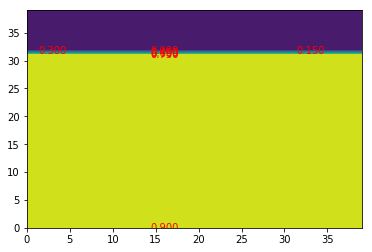

In [19]:
m = tempload.reshape(N,N)
cm = plt.contourf(m)
plt.clabel(cm,colors='r')

In [20]:
%matplotlib inline
temperatureViewer.plot(path + "temperature599.png")

<Figure size 432x288 with 0 Axes>

Plotting the value of the temperature in the middle of the cylinder at the convection surface.

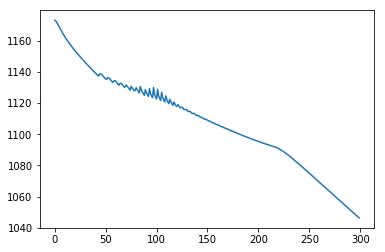

In [21]:
t=[]
for i in range(1,3000,10):
    load = np.loadtxt(path+"temperatureOH"+str(i))
    t.append(load.reshape(N,N)[10,0])
plt.plot(t)   

Plot of the temperature at central point of the cylinder. The temperature rises on the point and then drops again due to enthalphy of austinite to martensite phase transformation. Is this numerical instability??

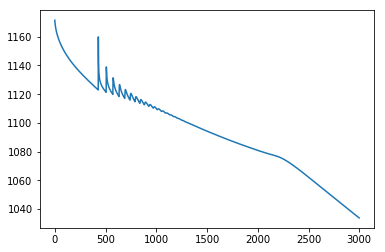

In [22]:
plta = plt.plot(Tvstime)

In [ ]:
plt.plot(Tvstime)
plt.plot(temp)
plt.show()